In [1]:
import random
import math

import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

In [3]:
X = np.array([[1,1],[-1,-1],[1,-1],[-1,1]])
y = np.array([[1, -1, 1, -1]])

In [10]:
N_A = 20
N_B = 20
N = N_A + N_B

[[ 1.60530685  0.47000708]
 [ 0.39599905 -0.59524588]
 [ 0.01976168 -0.14192973]
 [-1.29888298  0.29523916]
 [-1.62901603  0.51206963]
 [-0.13613928 -0.34600737]
 [-0.06229804 -0.21954296]
 [-0.1039878  -0.62083703]
 [ 1.38445029  0.41919369]
 [ 1.37934211  0.45122954]
 [-1.46364522  0.41666381]
 [ 0.22986751 -0.52425833]
 [-1.39544285  0.76843097]
 [-0.10886553 -1.11029369]
 [-0.38255319  0.16371209]
 [-1.18829575  0.75119882]
 [ 1.55048275  0.20749081]
 [ 1.54420065  0.431907  ]
 [-1.31827934  0.33181972]
 [-1.7062014   0.40333762]
 [ 1.81110878  0.31334002]
 [ 0.12302518 -0.46608282]
 [ 1.52239792  0.26160959]
 [-0.34055214 -0.56069123]
 [-1.10431825  0.88348894]
 [-0.37895778 -1.12612634]
 [ 0.47117391 -0.67563196]
 [ 0.65440622 -0.02587165]
 [-0.17180772  0.27438109]
 [-0.0036305  -0.83768936]
 [-0.4134639  -1.24117883]
 [ 1.49982076  0.29680152]
 [ 0.20774096 -0.85093807]
 [-0.8803268   0.07511198]
 [ 1.19033174  0.55305455]
 [-1.74143626  0.57496807]
 [-1.39041391  0.66902969]
 

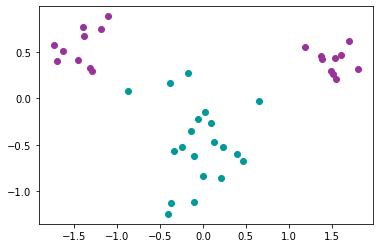

In [11]:
np.random.seed(19)

classA = np. concatenate ((
                            np.random.randn(N_A//2,2)*0.2+[1.5, 0.5], 
                            np.random.randn(N_A//2,2)*0.2+[-1.5, 0.5]
)) 
classB = np.random.randn(N_B,2)*0.5+[0.0,-0.5]

ax = plt.gca()
ax.scatter([p[0] for p in classA], [p[1] for p in classA], color='#993399')
ax.scatter([p[0] for p in classB], [p[1] for p in classB], color='#009999')

sample_limits = [ax.get_xlim(),ax.get_ylim()]

X = np.concatenate((classA, classB)) 
y = np.concatenate((np.ones(classA.shape[0]),-np.ones(classB.shape[0])))

def permute(X,y):
    '''Reorder observations randomly'''
    permute = list(range(len(X)))
    random.shuffle(permute)
    permuted_inputs = X[permute,:]
    permuted_targets = np.array([y[permute]])
    return permuted_inputs, permuted_targets

X, y = permute(X,y)

print(X)


In [12]:
# Kernel function

def kernel(x,y):
    '''Input vectors x,y'''
    #return (1+np.dot(x,y))**5
    #return np.exp(-np.linalg.norm(x-y)**2 / 2*4)
    return np.dot(x,y)

def kernel_matrix(x_vectors):
    '''Output matrix M_ij = K(x_i,x_j)'''
    N = len(x_vectors)
    K = np.zeros((N,N))
    for i in range(N):
        for j in range(N):
            K[i,j] = kernel(x_vectors[i], x_vectors[j])       
    return K

def precomputed(x_vectors,t_vector):
    '''Kernel with indicator values'''
    t_outer = t_vector.T@t_vector
    x_outer = kernel_matrix(x_vectors)
    return np.multiply(t_outer,x_outer)

P = precomputed(X,y)

def minimand(alpha):
    '''The function that is supposed to be minimized.
    Input: array alpha'''
    return 0.5*alpha.T@P@alpha-alpha.T@np.ones(N)

    

True
[7.20387103e-14 0.00000000e+00 2.30142764e-15 1.00000000e+01
 3.91448587e-14 6.84860891e-13 4.78205996e-13 0.00000000e+00
 0.00000000e+00 1.40121376e-13 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.00000000e+01 0.00000000e+00
 1.00000000e+01 1.59358792e-14 1.00000000e+01 3.35163440e+00
 0.00000000e+00 0.00000000e+00 5.18615061e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 8.53778502e+00
 1.00000000e+01 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.00000000e+01 0.00000000e+00 3.21851333e-13
 6.08676805e-14 3.80919322e-14 0.00000000e+00 8.06468115e-13]


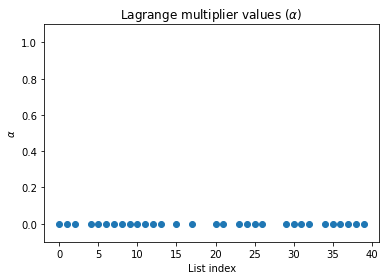

In [13]:
C = 10
zerofun = lambda alpha: np.dot(alpha,y.T)
solution = minimize(minimand, # objective
                    np.zeros(N), # start
                    bounds=[(0, C) for _ in range(N)],
                    constraints={'type':'eq', 'fun': zerofun})
multipliers = solution['x']
print(solution['success'])
print(multipliers)
plt.title(r"Lagrange multiplier values ($\alpha$)")
plt.xlabel("List index")
plt.ylabel(r"$\alpha$")
plt.ylim([-0.1,1.1])
plt.scatter(range(N),multipliers)

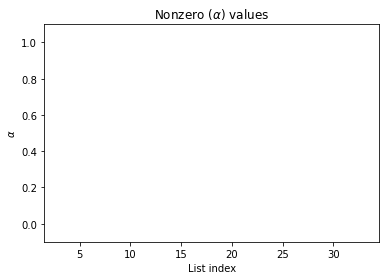

[ 0.          0.          0.         10.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.         10.          0.         10.          0.
 10.          3.3516344   0.          0.          5.18615061  0.
  0.          0.          0.          8.53778502 10.          0.
  0.          0.          0.         10.          0.          0.
  0.          0.          0.          0.        ]


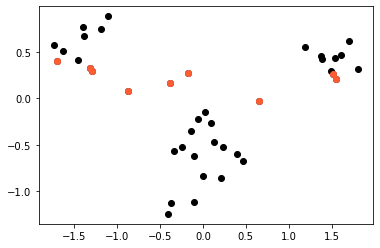

In [14]:
plt.title(r"Nonzero ($\alpha$) values")
plt.xlabel("List index")
plt.ylabel(r"$\alpha$")
plt.ylim([-0.1,1.1])

nonzero_indices = []
for idx, val in enumerate(multipliers):
    if val > 10**-5:
        nonzero_indices.append(idx)
        plt.scatter(idx, val)
    else:    
        multipliers[idx] = 0
plt.show()
print(multipliers)
        
support_vectors = np.take(X, nonzero_indices, axis=0)
plt.scatter(X[:,0],X[:,1],color='k')
plt.scatter(support_vectors[:,0],support_vectors[:,1],color='#ff5c33')



In [15]:
def threshold(sv_idx):
    '''Calculates b value'''
    return sum([multipliers[i]*y[0][i]*kernel(X[sv_idx],X[i]) for i in range(N)])-y[0][sv_idx]


thres = threshold(nonzero_indices[0])
print(thres)


def indicator(test_vector, threshold):
    return sum([multipliers[i]*y[0][i]*kernel(test_vector, X[i]) for i in range(N)]) - threshold


0.4632912592756373


2.856912737871882
-4.013028239067117
-1.3298238894549481
1.0
2.242927399183948
-2.6255063928743456
-1.8287291044042395
-4.305090692086875
2.4852000231851665
2.6806158885600393
1.7014615423143926
-3.621767035027678
3.8807344499404
-7.3130988731248765
0.43919535728882053
3.830751089121648
1.2295092293751946
2.606385240463897
1.2194797618979116
1.554176768244341
1.9500292222236126
-3.293217479148864
1.5543813731076668
-3.9994268410944365
4.666049249596657
-7.483207722398502
-4.486557025495956
-0.4457100960246656
1.175868994575417
-5.610128234949913
-8.199272951793564
1.7644729584517744
-5.634502191448805
-0.23932911341355734
3.255138111716813
2.598985034380595
3.2714768662300866
3.7821085572642428
-3.760936532986323
-2.0712213047924193
0.9500000000000005


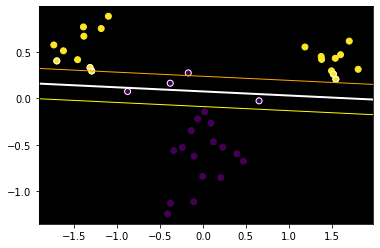

In [16]:
y_labeled = np.zeros(N)
score = 0
for i in range(N):
    y_labeled[i] = indicator(X[i],thres)
    print(y_labeled[i])
    if y_labeled[i] * y[0][i] > 0:
        score += 1/N
print(score)

support_vectors = np.take(X, nonzero_indices, axis=0)
plt.scatter(X[:,0],X[:,1],c=y)
plt.scatter(support_vectors[:,0],support_vectors[:,1],facecolors='none', edgecolors='w')

xgrid = np.linspace(-5,5)
ygrid = np.linspace(-4,4)
grid = np.array([[indicator([x,y],thres) for x in xgrid] for y in ygrid])
plt.contour(xgrid, ygrid, grid, (-1.0, 0.0, 1.0), colors=('yellow', 'white', 'orange'), linewidths=(1,2,1))
plt.xlim(sample_limits[0])
plt.ylim(sample_limits[1])
ax = plt.gca()
ax.set_facecolor('black')
plt.savefig("big_slack.jpg")

plt.show()

In [7]:
class SVMachine:
    '''Support vector machine
    clusters from three normal distributions'''
    def __init__(self, points_per_class=20, data=None):
        self.N_A = points_per_class
        self.N_B = points_per_class
        self.N = self.N_A + self.N_B
        
        self.X = None
        self.y = None
            
            
    def sample_clusters(
                        self, 
                        positions=[[1.5,0.5],[-1.5,0.5],[0.0,-0.5]], 
                        sizes=[0.2,0.2,0.5]
                        ):
        
        np.random.seed(19)
        classA = np. concatenate ((
                                    np.random.randn(self.N_A//2,2)*sizes[0]+positions[0], 
                                    np.random.randn(self.N_A//2,2)*sizes[1]+positions[1], 
        )) 
        classB = np.random.randn(self.N_B,2)*sizes[2]+positions[2]

        X = np.concatenate((classA, classB)) 
        y = np.concatenate((np.ones(classA.shape[0]),-np.ones(classB.shape[0])))

        def permute(X,y):
            '''Reorder observations randomly'''
            permute = list(range(len(X)))
            random.shuffle(permute)
            permuted_inputs = X[permute,:]
            permuted_targets = np.array([y[permute]])
            return permuted_inputs, permuted_targets

        self.X, self.y = permute(X,y)

    def plot_clusters(self):
        ax = plt.gca()
        ax.scatter([p[0] for p in classA], [p[1] for p in classA], color='#993399')
        ax.scatter([p[0] for p in classB], [p[1] for p in classB], color='#009999')

        self.sample_limits = [ax.get_xlim(),ax.get_ylim()]
        return ax
    
    
    def kernel(self,x,y):
        '''Input vectors x,y'''
        return (np.dot(x,y)+1)**3

    
    def kernel_matrix(self,x_vectors):
        '''Output matrix M_ij = K(x_i,x_j)'''
        N = self.N
        K = np.zeros((N,N))
        for i in range(N):
            for j in range(N):
                K[i,j] = self.kernel(x_vectors[i], x_vectors[j])       
        return K

    
    def precomputed(self,x_vectors,t_vector):
        '''Kernel with indicator values'''
        t_outer = t_vector.T@t_vector
        x_outer = self.kernel_matrix(x_vectors)
        return np.multiply(t_outer,x_outer)


    def minimand(self,alpha):
        '''The function that is supposed to be minimized.
        Input: array alpha'''
        return 0.5*alpha.T@self.precomputed@alpha-alpha.T@np.ones(self.N)
    
    
    def clean_multipliers(self):
        nonzero_indices = []
        for idx, val in enumerate(self.multipliers):
            if val > 10**-5:
                nonzero_indices.append(idx)
            else:    
                self.multipliers[idx] = 0
        self.nonzero_indices = nonzero_indices
    
    
    def set_threshold(self):
        '''Calculates b value'''
        sv_idx = self.nonzero_indices[0]
        self.threshold = sum(
                            [self.multipliers[i]*self.y[0][i]*self.kernel(self.X[sv_idx],self.X[i]) 
                             for i in range(self.N)]
                            ) - self.y[0][sv_idx]

        
    def indicator(self,test_vector):
        return sum([self.multipliers[i]*self.y[0][i]*self.kernel(test_vector, self.X[i]) 
                    for i in range(self.N)]) - self.threshold
    
    
    def run_machine(self, C=None):
        if self.X is None and self.y is None:
            print('hi')
            self.sample_clusters()
            
        self.precomputed = self.precomputed(self.X,self.y)
        zerofun = lambda alpha: np.dot(alpha,self.y.T)
        solution = minimize(self.minimand, # objective
                            np.zeros(self.N), # start
                            bounds=[(0, C) for _ in range(self.N)],
                            constraints={'type':'eq', 'fun': zerofun})
        self.multipliers = solution['x']
        self.clean_multipliers()
        self.set_threshold()
        
        self.y_labeled = np.zeros(self.N)
        for i in range(self.N):
            self.y_labeled[i] = self.indicator(self.X[i])
            
    def get_accuracy(self):
        score = 0
        print(self.y)
        for i in range(self.N):
            print(self.y_labeled[i])
            print(self.y[0][i])
            if self.y_labeled[i] * self.y[0][i] > 0:
                score += 1
        return score/self.N
        

In [8]:
svm = SVMachine()
svm.sample_clusters(sizes=[0.2,0.2,0.5])
svm.run_machine()
svm.get_accuracy()

[[ 1.  1.  1. -1.  1.  1.  1.  1. -1.  1. -1.  1.  1. -1. -1.  1.  1. -1.
  -1. -1. -1.  1. -1. -1. -1. -1. -1. -1. -1.  1. -1. -1. -1.  1. -1.  1.
   1.  1.  1.  1.]]
3.325412584725695
1.0
1.0
1.0
4.768464969066919
1.0
-2.0238210583912517
-1.0
0.9997599516417108
1.0
1.5532789983883557
1.0
1.593127632834793
1.0
3.6595265494343105
1.0
-2.150822192330086
-1.0
1.182286865529972
1.0
-2.0024828817185574
-1.0
3.899235236501917
1.0
2.8009809962652645
1.0
-1.802819386437155
-1.0
-2.32104555247395
-1.0
1.4513558098435233
1.0
2.0967500085552317
1.0
-2.2220753885883786
-1.0
-1.8595012412320808
-1.0
-2.07183627061765
-1.0
-1.1952433087687424
-1.0
1.3980374087851817
1.0
-1.0002348894144975
-1.0
-1.8384811605442366
-1.0
-2.0867812739269915
-1.0
-2.228078390283317
-1.0
-2.45421865954407
-1.0
-1.8014760352351264
-1.0
-2.090797236070199
-1.0
1.5026527044084697
1.0
-2.414340519115242
-1.0
-2.229560326323382
-1.0
-2.0292518727901556
-1.0
1.5884369453382932
1.0
-2.2243843617653383
-1.0
2.4227552232042986


1.0